## Les Miz Sentiment Analysis: Death of Gavroche, in English and French  

## the plan: 
1. reformat English and French version into coherent word groups 
2. send english DF and French DF through "cardiffnlp/twitter-xlm-roberta-base-sentiment" model
3. compare specific phrases and overall results 

In [4]:
import torch
from transformers import pipeline
import pandas as pd

In [5]:
edf = pd.read_csv("books/english.csv", index_col = 0)
edf.head()

""
0
It was a charming and terrible sight
"Gavroche, though shot at, was teasing the fusillade."
He had the air of being greatly diverted
It was the sparrow pecking at the sportsmen
To each discharge he retorted


In [2]:
# model:
# list = []
# for row in ebx: 
#     td = row.select("td")
#     dict = {}
#     dict["station"] = td[0].text.strip()
#     dict["address"] = td[1].text.strip()
#     list.append(dict)
# print(list)    

In [61]:
#this is INCOMPLETE: 
# results = []
# # for sentences in df:
# for index, row in edf.iterrows():
#     dict = {}
#     sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")
#     data = index 
#     rating = sentiment_pipeline(data)
#     print(index)
#     print(rating)
#     #df['score'] = rating
#     # print(df['score'])
#     dict['label'] = rating[0]['label']
#     dict['score'] = rating[0]['score']
#     results.append(dict)
# print(results) 

In [6]:
results = []
# for sentences in df:
for index, row in edf.iterrows():
    dict = {}
    sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")
    data = index 
    rating = sentiment_pipeline(data)
    print(index)
    print(rating)
    #df['score'] = rating
    # print(df['score'])
    dict['text'] = index
    dict['label'] = rating[0]['label']
    dict['score'] = rating[0]['score']
    results.append(dict)
print(results) 

It was a charming and terrible sight
[{'label': 'negative', 'score': 0.9529926180839539}]
 Gavroche, though shot at, was teasing the fusillade. 
[{'label': 'negative', 'score': 0.4210546612739563}]
 He had the air of being greatly diverted
[{'label': 'positive', 'score': 0.48061373829841614}]
 It was the sparrow pecking at the sportsmen
[{'label': 'negative', 'score': 0.5273667573928833}]
 To each discharge he retorted
[{'label': 'neutral', 'score': 0.43959590792655945}]
with a couplet
[{'label': 'neutral', 'score': 0.4968397617340088}]
 They aimed at him constantly
[{'label': 'negative', 'score': 0.6753860712051392}]
 and always missed him
[{'label': 'negative', 'score': 0.3560687005519867}]
The National Guardsmen and the soldiers laughed as they took aim at him.
[{'label': 'positive', 'score': 0.5773722529411316}]
 He lay down
[{'label': 'neutral', 'score': 0.549929141998291}]
 sprang to his feet
[{'label': 'neutral', 'score': 0.5386978387832642}]
 hid in the corner of a doorway
[{'l

In [38]:
engdf = pd.DataFrame(results)
engdf

,text,label,score
0,It was a charming and terrible sight,negative,0.952993
1,"Gavroche, though shot at, was teasing the fus...",negative,0.421055
2,He had the air of being greatly diverted,positive,0.480614
3,It was the sparrow pecking at the sportsmen,negative,0.527367
4,To each discharge he retorted,neutral,0.439596
5,with a couplet,neutral,0.496840
6,They aimed at him constantly,negative,0.675386
7,and always missed him,negative,0.356069
8,The National Guardsmen and the soldiers laughe...,positive,0.577372
9,He lay down,neutral,0.549929


In [50]:
# print(engdf[2]['label'])
print(engdf.loc[2].at["label"])

positive


In [39]:
len(engdf)

58

In [40]:
engdf2 = engdf['score'].mean()
engdf2

0.5888202323995787

In [ ]:

# france_array = []
# england_array = []
# germany_array = []
# others_array = []
# total_array = []

# for q in consorts["places"]:
#     places = str(consorts['places'])
#     total +=1
#     if q == "France":
#         france += 1     
#     elif q == "England":
#         england += 1
        
#     elif q == "Germany":
#         germany += 1
#     else:
#         others += 1
    
#     total_array.append(total)
#     france_array.append(france)
#     england_array.append(england) 
#     germany_array.append(germany)
#     others_array.append(others)

#     consorts["France"] = france_array
#     consorts["Germany"] = germany_array
#     consorts["England"] = england_array


In [51]:
#DO NOT USE!! STUPIDLY COMPLEX! 
positives = 0
poscore = 0
negatives = 0
negscore = 0
neutrals = 0
neuscore = 0

for row in engdf:
    if row['label']== 'positive':
        positives +=1
        poscore = int(row['score'])
    elif row['label']== 'negative':
        negatives +=1
        negscore = int(row['score'])
    elif row['label']== 'neutral':
        neutrals +=1
        neuscore = int(row['label'])
print(positives, poscore)
print(negatives, negscore)
print(neutrals, neuscore)



TypeError: string indices must be integers

In [55]:
engdf['label'].value_counts()

label
negative    28
neutral     26
positive     4
Name: count, dtype: int64

In [56]:
engdf.groupby(['label'])['score'].mean()

label
negative    0.662522
neutral     0.515846
positive    0.547237
Name: score, dtype: float64

In [25]:
fdf = pd.read_csv("books/french.csv", index_col = 0)
fdf.head()

""
0
Le spectacle était épouvantable et charmant
"Gavroche, fusillé, taquinait la fusillade"
Il avait l'air de s'amuser beaucoup
C'était le moineau becquetant les chasseurs
Il répondait à chaque décharge


In [42]:
fresults = []
# for sentences in df:
for index, row in fdf.iterrows():
    dict = {}
    sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")
    data = index 
    rating = sentiment_pipeline(data)
    print(index)
    print(rating)
    #df['score'] = rating
    # print(df['score'])
    dict['text'] = index
    dict['label'] = rating[0]['label']
    dict['score'] = rating[0]['score']
    fresults.append(dict)
# print(f-results) 

Le spectacle était épouvantable et charmant
[{'label': 'positive', 'score': 0.9434570670127869}]
 Gavroche, fusillé, taquinait la fusillade
[{'label': 'negative', 'score': 0.8871347904205322}]
 Il avait l'air de s'amuser beaucoup
[{'label': 'positive', 'score': 0.9017786383628845}]
 C'était le moineau becquetant les chasseurs
[{'label': 'negative', 'score': 0.795271635055542}]
 Il répondait à chaque décharge
[{'label': 'neutral', 'score': 0.5504280924797058}]
par un couplet
[{'label': 'neutral', 'score': 0.5416300296783447}]
 On le visait sans cesse
[{'label': 'positive', 'score': 0.413178950548172}]
 on le manquait toujours
[{'label': 'negative', 'score': 0.6138972043991089}]
 Les gardes nationaux et les soldats riaient en l'ajustant
[{'label': 'negative', 'score': 0.7059093713760376}]
 Il se couchait
[{'label': 'negative', 'score': 0.7937528491020203}]
 puis se redressait
[{'label': 'negative', 'score': 0.42073869705200195}]
 s'effaçait dans un coin de porte
[{'label': 'negative', 's

In [43]:
frdf = pd.DataFrame(fresults)
frdf

,text,label,score
0,Le spectacle était épouvantable et charmant,positive,0.943457
1,"Gavroche, fusillé, taquinait la fusillade",negative,0.887135
2,Il avait l'air de s'amuser beaucoup,positive,0.901779
3,C'était le moineau becquetant les chasseurs,negative,0.795272
4,Il répondait à chaque décharge,neutral,0.550428
5,par un couplet,neutral,0.541630
6,On le visait sans cesse,positive,0.413179
7,on le manquait toujours,negative,0.613897
8,Les gardes nationaux et les soldats riaient e...,negative,0.705909
9,Il se couchait,negative,0.793753


In [44]:
frdf2 = frdf['score'].mean()
frdf2

0.5924689867373171

## The French original is overwhelmingly negative -- 41 out of 58 labels; only 12 neutrals

In [57]:
frdf['label'].value_counts()

label
negative    41
neutral     12
positive     5
Name: count, dtype: int64

## The English translation has almost the same number of negatives (28) and neutrals (26)

In [60]:
engdf['label'].value_counts()

label
negative    28
neutral     26
positive     4
Name: count, dtype: int64

### French labels and scores: 

In [58]:
frdf.groupby(['label'])['score'].mean()

label
negative    0.630391
neutral     0.457744
positive    0.604849
Name: score, dtype: float64

### English labels and scores: 

In [59]:
engdf.groupby(['label'])['score'].mean()

label
negative    0.662522
neutral     0.515846
positive    0.547237
Name: score, dtype: float64

In [63]:
frdf.to_csv("hugo_fr_labels.csv")

In [64]:
engdf.to_csv("hugo_en_labels.csv")

In [ ]:
mfh

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

for items in french_df: 
        
texts = [xxxx]

places = ['France', 'England', 'England', 'England', 'Spain', 
          'England', 'England', 'Germany', 'England', 'England',
          'Denmark', 'France']

# ones = [1] * len(names)  

df = pd.DataFrame({'Name': names, 'places': places, 'ones': ones})

custom_colors = {'France': '#0068ff',
                 'Spain': '#008838',
                 'England': '#ff59c4',
                 'Germany': '#fa8c00',
                 'Denmark': '#b67ac9'}

color_strentgh = {"score":
    
}

ax = sns.barplot(x='Name', y='ones', data=df, hue='places', palette=custom_colors, color_strength)

ax.legend(bbox_to_anchor=(1,1), loc=2)

plt.show()

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

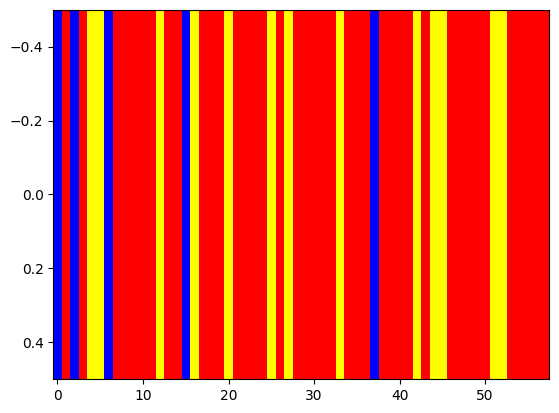

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)


# Map labels to colors
colors = []
for label in df['label']:
  if label == 'negative':
    colors.append('red') 
  elif label == 'neutral':
    colors.append('yellow')
  else:
    colors.append('blue')


# Convert to RGBA values
rgba_colors = [mcolors.to_rgba(c) for c in colors]

# Plot heatmap 
plt.imshow([rgba_colors], aspect='auto')



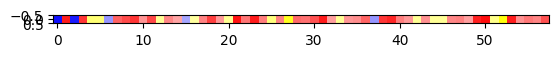

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)

# Map labels to colors
colors = []
for label in df['label']:
  if label == 'negative':
    colors.append('red') 
  elif label == 'neutral':
    colors.append('yellow')
  else:
    colors.append('blue')

rgba_colors = []
for color, score in zip(colors, df['score']):
  # rgba = mcolors.to_rgba(color)
  # rgba[3] = score # Set alpha channel to score
  # rgba_colors.append(rgba)
    r, g, b = mcolors.to_rgb(color)
    rgba_color = [r, g, b, score]
    rgba_colors.append(rgba_color)

plt.imshow([rgba_colors])

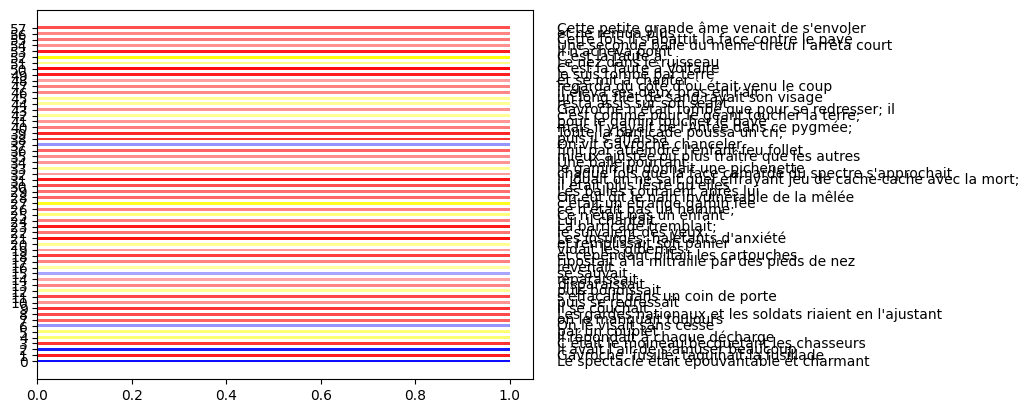

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)

# Create figure 
fig, ax = plt.subplots()

y_pos = range(len(df)) 

for i, row in df.iterrows():

    #tuple error:
  # color = colors[i] 
  # rgba = mcolors.to_rgba(color)
  # rgba[3] = row['score']  
      
# Get RGB values  
  r, g, b = mcolors.to_rgb(colors[i])
  
  # Build RGBA array
  rgba = [r, g, b, row['score']] 

  # Add horizontal bar
  ax.barh(y=i, width=1, height=0.5, color=rgba, align='center')

  # Add text
  ax.text(1.1, i, row['text'], va='center')

plt.yticks(y_pos)
plt.show()


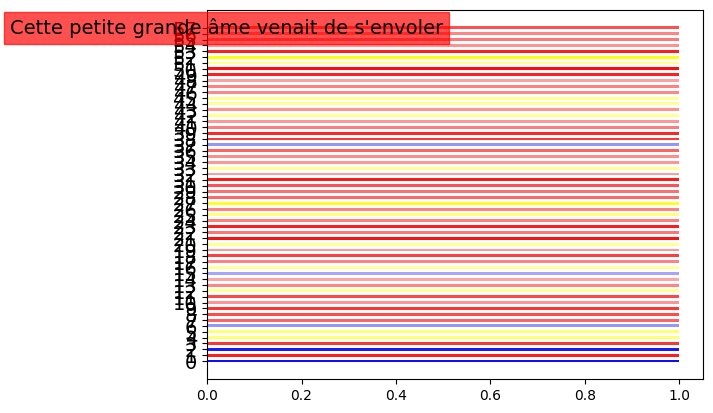

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors

df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)

# Create figure 
fig, ax = plt.subplots()

y_pos = range(len(df)) 

bar_height = 0.5 # Set larger height


for i, row in df.iterrows():
      
# Get RGB values  
  r, g, b = mcolors.to_rgb(colors[i])  
# Build RGBA array
  rgba = [r, g, b, row['score']] 


  # Draw background bar
#  ax.barh(y=i, width=1, height=0.5, color=rgba, align='center')
    
    # Draw TALLER  bar 
  ax.barh(y=i, width=1, height=bar_height, color=rgba, align='center')  


  
  #the lines below generated a typeerror 
# Overlay text
  # ax.text(0.5, i, row['text'], fontsize=14, va='center', ha='right',
  #         bbox=dict(boxstyle="square", ec=rgba, fc=rgba)) 

#new attempt, also unworking: 
# Define bbox dict
# bbox_dict = dict(boxstyle="square", ec=rgba, fc=rgba)
# # Pass to text
# ax.text(0.5, i, row['text'], fontsize=14, va='center', ha='right',
#         bbox=bbox_dict)

#First we need to define a boxstyle. This can just be a string:
boxstyle = "square"
#Then we build the bbox dict using that boxstyle, and the RGBA color:
bbox_dict = {'boxstyle': boxstyle, 'ec': rgba, 'fc': rgba}
#Now bbox_dict is a proper dictionary that can be passed to ax.text:
#ax.text(0.5, i, row['text'], fontsize=14, va='center', ha='right', bbox=bbox_dict)

  # Display text
ax.text(0.5, i, row['text'], fontsize=14, verticalalignment='center', 
         horizontalalignment='right', bbox=bbox_dict)

# Set larger y-axis ticks   
plt.yticks(y_pos, fontsize=14) 

plt.show()

In [ ]:
#MODEL: 
# import altair as alt
# import numpy as np
# import pandas as pd

# # Compute x^2 + y^2 across a 2D grid
# x, y = np.meshgrid(range(-5, 5), range(-5, 5))
# z = x ** 2 + y ** 2

# # Convert this grid to columnar data expected by Altair
# source = pd.DataFrame({'x': x.ravel(),
#                      'y': y.ravel(),
#                      'z': z.ravel()})

# alt.Chart(source).mark_rect().encode(
#     x='x:O',
#     y='y:O',
#     color='z:Q'
# )

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import plotly.graph_objects as go
import altair as alt
import numpy as np

df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)


# Define color mappings
color_scale = alt.Scale(domain=['negative', 'neutral', 'positive'],
                        range=['red', 'yellow', 'blue'])
opacity_scale = alt.Scale(domain=[0, 1], range=[0.2, 1])

# Create the Altair chart
heatmap = alt.Chart(df).mark_bar().encode(
    y=alt.Y('text:N', title='Text'),
    x=alt.X('label:N', title='Label', sort=['negative', 'neutral', 'positive']),
    color=alt.Color('label:N', scale=color_scale),
    opacity=alt.Opacity('score:Q', scale=opacity_scale),
    tooltip=['text', 'label', 'score']
).properties(
    width=600,
    height=600
)

heatmap


alt.Chart(...)

In [106]:
!pip install --upgrade altair

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
DEPRECATION: dexplot 0.1.4 has a non-standard dependency specifier scipy>=1.0matplotlib>=3.1. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dexplot or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [107]:
df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)

# # Define color scale for positive values (blue shades)
# blue_scale = alt.Scale(domain=(0, 1), range=["#f0f9e8", "#a1d76a", "#31a354", "#006d2c"])

# # Define color scale for negative values (red shades)
# red_scale = alt.Scale(domain=(0, 1), range=["#fef0d9", "#fdcc8a", "#fc8d59", "#d7301f"])

# # Define color scale for neutral values (yellow shades)
# yellow_scale = alt.Scale(domain=(0, 1), range=["#ffffcc", "#ffeda0", "#fed976", "#feb24c"])

# # Create the Altair chart
# heatmap = alt.Chart(df).mark_bar().encode(
#     y=alt.Y('text:N', title='Text', sort=None),
#     x=alt.X('label:N', title='Label', sort=['negative', 'neutral', 'positive']),
#     color=alt.Color('label:N', scale=alt.Scale(domain=['negative', 'neutral', 'positive'], range=['red', 'yellow', 'blue'])),
#     opacity=alt.Opacity('score:Q', scale=alt.Scale(scheme='viridis')),
#     tooltip=['text', 'label', 'score']
# ).properties(
#     width=600,
#     height=600
# )

#this resulted in an all-orange affair: 
# # Create a quantile scale for color to get natural breaks
# color_scale = alt.Scale(
#     domain=[0, 0.2, 0.4, 0.6, 0.8, 1],
#     range=['#f0f8ff', '#faebd7', '#cd5c5c', '#ff4500', '#8b0000', '#800000']
# )

# # Create the Altair chart
# heatmap = alt.Chart(df).mark_bar().encode(
#     y=alt.Y('text:N', title='Text', sort=None),
#     x=alt.X('label:N', title='Label', sort=['negative', 'neutral', 'positive']),
#     color=alt.Color('score:Q', scale=color_scale),
#     tooltip=['text', 'label', 'score']
# ).properties(
#     width=600,
#     height=600
# )



# Define color mappings
color_scale = alt.Scale(domain=['negative', 'neutral', 'positive'],
                        range=['red', 'yellow', 'blue'])
opacity_scale = alt.Scale(domain=[0, 1], range=[0.8, 1])

# Create the Altair chart
heatmap = alt.Chart(df).mark_bar().encode(
    y=alt.Y('text:N', title='Text', sort=None),
    x=alt.X('label:N', title='Label', sort=['negative', 'neutral', 'positive']),
    color=alt.Color('label:N', scale=color_scale),
    opacity=alt.Opacity('score:Q', scale=opacity_scale),
    tooltip=['text', 'label', 'score']
).properties(
    width=150,
    height=600
).facet(
    column=alt.Column('dummy:N', header=None),  # Create a dummy column to align all bars in a single column
).transform_calculate(
    dummy="'All'"  # A dummy value to create a single column
)

heatmap.configure_view(strokeOpacity=0)  # Remove gridlines and axis ticks

heatmap


alt.FacetChart(...)

In [12]:
import altair as alt 


df = pd.DataFrame({
  'text': ["Le spectacle était épouvantable et charmant", "Gavroche, fusillé, taquinait la fusillade",  
           "Il avait l'air de s'amuser beaucoup", "C'était le moineau becquetant les chasseurs",
           "Il répondait à chaque décharge", "par un couplet", "On le visait sans cesse",
           "on le manquait toujours", "Les gardes nationaux et les soldats riaient en l'ajustant", 
           "Il se couchait", "puis se redressait", "s'effaçait dans un coin de porte",
           "puis bondissait", "disparaissait", "reparaissait", "se sauvait", "revenait",
           "ripostait à la mitraille par des pieds de nez", "et cependant pillait les cartouches",
           "vidait les gibernes", "et remplissait son panier", "Les insurgés, haletants d'anxiété",
           "le suivaient des yeux", "La barricade tremblait;", "Lui, il chantait",  
           "Ce n'était pas un enfant", "ce n'était pas un homme;", "c'était un étrange gamin fée",
           "On eût dit le nain invulnérable de la mêlée", "Les balles couraient après lui",
           "il était plus leste qu'elles", "Il jouait on ne sait quel effrayant jeu de cache-cache avec la mort;",
           "chaque fois que la face camarde du spectre s'approchait",
           "le gamin lui donnait une pichenette", "Une balle pourtant",
           "mieux ajustée ou plus traître que les autres", "finit par atteindre l'enfant feu follet",
           "On vit Gavroche chanceler", "puis il s’affaissa", "Toute la barricade poussa un cri;",
           "mais il y avait de l'Antée dans ce pygmée;", "pour le gamin toucher le pavé",
           "c'est comme pour le géant toucher la terre;", "Gavroche n'était tombé que pour se redresser; il", 
           "resta assis sur son séant", "un long filet de sang rayait son visage",
           "il éleva ses deux bras en l’air", "regarda du côté d'où était venu le coup",
           "et se mit à chanter", "Je suis tombé par terre", "C'est la faute à Voltaire",
           "Le nez dans le ruisseau", "C'est la faute à", "Il n'acheva point",
           "Une seconde balle du même tireur l'arrêta court",
           "Cette fois il s'abattit la face contre le pavé", "et ne remua plus",
           "Cette petite grande âme venait de s'envoler"],
           
  'label': ['positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 
            'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'negative', 'positive', 'neutral', 'negative', 
            'negative', 'negative', 'neutral', 'negative', 'negative', 'negative', 
            'negative', 'neutral', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'negative', 'negative', 
            'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 
            'neutral', 'negative', 'neutral', 'neutral', 'negative', 'negative', 
            'negative', 'negative', 'negative', 'neutral', 'neutral', 'negative', 
            'negative', 'negative', 'negative', 'negative'],
            
  'score': [0.943457, 0.887135, 0.901779, 0.795272, 0.550428, 0.541630, 0.413179, 
            0.613897, 0.705909, 0.793753, 0.420739, 0.722869, 0.415614, 0.478407, 
            0.353580, 0.350029, 0.377874, 0.490187, 0.753360, 0.403735, 0.424990, 
            0.935065, 0.542796, 0.894321, 0.509921, 0.512246, 0.495888, 0.878073, 
            0.591483, 0.559884, 0.683789, 0.901326, 0.382701, 0.419271, 0.415556, 
            0.445173, 0.608906, 0.415800, 0.788411, 0.851386, 0.507984, 0.407572, 
            0.417629, 0.433103, 0.411866, 0.414654, 0.472125, 0.494336, 0.373227, 
            0.876672, 0.952087, 0.458830, 0.956367, 0.889711, 0.431022, 0.531520, 
            0.479124, 0.685550]}
)
# Convert 'label' column to category type
df['label'] = df['label'].astype('category')

# Assign specific colors to the categories in 'label'
df['label'] = df['label'].cat.set_categories(['positive', 'neutral', 'negative'], ordered=True)
df['color'] = df['label'].map({'positive': 'blue', 'neutral': 'yellow', 'negative': 'red'})

# Create Altair chart
chart = alt.Chart(df).mark_bar().encode(
    x='text:O',
    color=alt.Color('color:N', scale=None),
    opacity='score:Q',
    tooltip=['text', 'label', 'score']
).properties(width=800)

chart.display()

alt.Chart(...)

In [14]:
import seaborn as sns

# Convert 'label' column to category type
df['label'] = df['label'].astype('category')

# Assign specific colors to the categories in 'label'
df['label'] = df['label'].cat.set_categories(['positive', 'neutral', 'negative'], ordered=True)

# Define color palettes
positive_palette = sns.color_palette("Blues", 100).as_hex() 
neutral_palette = sns.color_palette("YlOrBr", 100).as_hex() # Beige/Tan color palette
negative_palette = sns.color_palette("Reds", 100).as_hex() # Dark Crimson color palette

# Assign colors based on score and label
df['color'] = df.apply(lambda row: positive_palette[int(row['score']*100-1)] if row['label']=='positive'
                       else (neutral_palette[int(row['score']*100-1)] if row['label']=='neutral'
                       else negative_palette[int(row['score']*100-1)]), axis=1)

# Create Altair chart
chart = alt.Chart(df).mark_bar().encode(
    y=alt.Y('text:O', sort='-x'),
    color=alt.Color('color:N', scale=None),
    opacity='score:Q',
    tooltip=['text', 'label', 'score']
).properties(height=800)

chart.display()


alt.Chart(...)

In [ ]:
# MODEL:
# dict['text'] = index
#     dict['label'] = rating[0]['label']
#     dict['score'] = rating[0]['score']

In [121]:
for row in fresults: 
    if row['label'] == 'negative':
        if row['score'] > 0.5:
            row['categ_score'] = -2
        else: 
            row['categ_score'] = -1
    elif row['label'] == 'positive':
        if row['score'] > 0.5:
            row['categ_score'] = 2
        else:
            row['categ_score'] = 1
    else:
        row['categ_score'] = 0
print(fresults)            
            
    

[{'text': 'Le spectacle était épouvantable et charmant', 'label': 'positive', 'score': 0.9434570670127869, 'categ_score': 2}, {'text': ' Gavroche, fusillé, taquinait la fusillade', 'label': 'negative', 'score': 0.8871347904205322, 'categ_score': -2}, {'text': " Il avait l'air de s'amuser beaucoup", 'label': 'positive', 'score': 0.9017786383628845, 'categ_score': 2}, {'text': " C'était le moineau becquetant les chasseurs", 'label': 'negative', 'score': 0.795271635055542, 'categ_score': -2}, {'text': ' Il répondait à chaque décharge', 'label': 'neutral', 'score': 0.5504280924797058, 'categ_score': 0}, {'text': 'par un couplet', 'label': 'neutral', 'score': 0.5416300296783447, 'categ_score': 0}, {'text': ' On le visait sans cesse', 'label': 'positive', 'score': 0.413178950548172, 'categ_score': 1}, {'text': ' on le manquait toujours', 'label': 'negative', 'score': 0.6138972043991089, 'categ_score': -2}, {'text': " Les gardes nationaux et les soldats riaient en l'ajustant", 'label': 'negat

In [123]:
fr_categ = pd.DataFrame(fresults)
fr_categ.head()

,text,label,score,categ_score
0,Le spectacle était épouvantable et charmant,positive,0.943457,2
1,"Gavroche, fusillé, taquinait la fusillade",negative,0.887135,-2
2,Il avait l'air de s'amuser beaucoup,positive,0.901779,2
3,C'était le moineau becquetant les chasseurs,negative,0.795272,-2
4,Il répondait à chaque décharge,neutral,0.550428,0


In [124]:
fr_categ.to_csv("fr_categ.csv")

In [7]:
for row in results: 
    if row['label'] == 'negative':
        if row['score'] > 0.5:
            row['categ_score'] = -2
        else: 
            row['categ_score'] = -1
    elif row['label'] == 'positive':
        if row['score'] > 0.5:
            row['categ_score'] = 2
        else:
            row['categ_score'] = 1
    else:
        row['categ_score'] = 0
print(results[0])      

{'text': 'It was a charming and terrible sight', 'label': 'negative', 'score': 0.9529926180839539, 'categ_score': -2}


In [8]:
miz_eng_categ = pd.DataFrame(results)
miz_eng_categ.head()

,text,label,score,categ_score
0,It was a charming and terrible sight,negative,0.952993,-2
1,"Gavroche, though shot at, was teasing the fus...",negative,0.421055,-1
2,He had the air of being greatly diverted,positive,0.480614,1
3,It was the sparrow pecking at the sportsmen,negative,0.527367,-2
4,To each discharge he retorted,neutral,0.439596,0


In [9]:
miz_eng_categ.to_csv("miz_eng_categ.csv")

In [ ]:
#create a language column and set to english -- same for french

In [17]:
type(fr_categ)

NameError: name 'fr_categ' is not defined

In [18]:
miz_eng_categ["language"] = "english"
miz_eng_categ.head()

,text,label,score,categ_score,language
0,It was a charming and terrible sight,negative,0.952993,-2,english
1,"Gavroche, though shot at, was teasing the fus...",negative,0.421055,-1,english
2,He had the air of being greatly diverted,positive,0.480614,1,english
3,It was the sparrow pecking at the sportsmen,negative,0.527367,-2,english
4,To each discharge he retorted,neutral,0.439596,0,english


In [27]:
import pandas as pd
import numpy as np

In [31]:
miz_eng_categ["line_num"] = np.arange(len(miz_eng_categ))+1

In [32]:
miz_eng_categ.head()

,text,label,score,categ_score,language,line_num
0,It was a charming and terrible sight,negative,0.952993,-2,english,1
1,"Gavroche, though shot at, was teasing the fus...",negative,0.421055,-1,english,2
2,He had the air of being greatly diverted,positive,0.480614,1,english,3
3,It was the sparrow pecking at the sportsmen,negative,0.527367,-2,english,4
4,To each discharge he retorted,neutral,0.439596,0,english,5


In [21]:
#df = px.data.consorts()
fr_categ = pd.read_csv('hugo/miz_fr_categ.csv')
fr_categ.head()

,Unnamed: 0,text,label,score,categ_score
0,0,Le spectacle était épouvantable et charmant,positive,0.943457,2
1,1,"Gavroche, fusillé, taquinait la fusillade",negative,0.887135,-2
2,2,Il avait l'air de s'amuser beaucoup,positive,0.901779,2
3,3,C'était le moineau becquetant les chasseurs,negative,0.795272,-2
4,4,Il répondait à chaque décharge,neutral,0.550428,0


In [22]:
fr_categ["language"] = "french"
fr_categ.head()

,Unnamed: 0,text,label,score,categ_score,language
0,0,Le spectacle était épouvantable et charmant,positive,0.943457,2,french
1,1,"Gavroche, fusillé, taquinait la fusillade",negative,0.887135,-2,french
2,2,Il avait l'air de s'amuser beaucoup,positive,0.901779,2,french
3,3,C'était le moineau becquetant les chasseurs,negative,0.795272,-2,french
4,4,Il répondait à chaque décharge,neutral,0.550428,0,french


In [33]:
fr_categ["line_num"] = np.arange(len(fr_categ))+1

In [34]:
fr_categ.head()

,Unnamed: 0,text,label,score,categ_score,language,line_num
0,0,Le spectacle était épouvantable et charmant,positive,0.943457,2,french,1
1,1,"Gavroche, fusillé, taquinait la fusillade",negative,0.887135,-2,french,2
2,2,Il avait l'air de s'amuser beaucoup,positive,0.901779,2,french,3
3,3,C'était le moineau becquetant les chasseurs,negative,0.795272,-2,french,4
4,4,Il répondait à chaque décharge,neutral,0.550428,0,french,5


In [36]:
fr_categ = fr_categ.drop('Unnamed: 0', axis=1)
fr_categ.head()

,text,label,score,categ_score,language,line_num
0,Le spectacle était épouvantable et charmant,positive,0.943457,2,french,1
1,"Gavroche, fusillé, taquinait la fusillade",negative,0.887135,-2,french,2
2,Il avait l'air de s'amuser beaucoup,positive,0.901779,2,french,3
3,C'était le moineau becquetant les chasseurs,negative,0.795272,-2,french,4
4,Il répondait à chaque décharge,neutral,0.550428,0,french,5


In [38]:
miz_eng_categ.head()

,text,label,score,categ_score,language,line_num
0,It was a charming and terrible sight,negative,0.952993,-2,english,1
1,"Gavroche, though shot at, was teasing the fus...",negative,0.421055,-1,english,2
2,He had the air of being greatly diverted,positive,0.480614,1,english,3
3,It was the sparrow pecking at the sportsmen,negative,0.527367,-2,english,4
4,To each discharge he retorted,neutral,0.439596,0,english,5


In [49]:
combo = pd.concat([miz_eng_categ, fr_categ], ignore_index=True, axis = 0)

In [50]:
combo.head()

,text,label,score,categ_score,language,line_num
0,It was a charming and terrible sight,negative,0.952993,-2,english,1
1,"Gavroche, though shot at, was teasing the fus...",negative,0.421055,-1,english,2
2,He had the air of being greatly diverted,positive,0.480614,1,english,3
3,It was the sparrow pecking at the sportsmen,negative,0.527367,-2,english,4
4,To each discharge he retorted,neutral,0.439596,0,english,5


In [51]:
combo.tail()

,text,label,score,categ_score,language,line_num
111,Il n'acheva point,negative,0.889711,-2,french,54
112,Une seconde balle du même tireur l'arrêta court,negative,0.431022,-1,french,55
113,Cette fois il s'abattit la face contre le pavé,negative,0.531520,-2,french,56
114,et ne remua plus,negative,0.479124,-1,french,57
115,Cette petite grande âme venait de s'envoler,negative,0.685550,-2,french,58


In [42]:
import json

In [52]:
combo.to_csv("hugo/combo.csv")

In [45]:
combo.to_json("combo.json")

AttributeError: 'NoneType' object has no attribute 'to_json'

In [43]:
with open("hugo/combo.json", "w") as outfile:
    json.dump(combo, outfile)

TypeError: Object of type DataFrame is not JSON serializable

In [54]:
df2 = combo.to_json(orient = 'records')
print(df2)

[{"text":"It was a charming and terrible sight","label":"negative","score":0.9529926181,"categ_score":-2,"language":"english","line_num":1},{"text":" Gavroche, though shot at, was teasing the fusillade. ","label":"negative","score":0.4210546613,"categ_score":-1,"language":"english","line_num":2},{"text":" He had the air of being greatly diverted","label":"positive","score":0.4806137383,"categ_score":1,"language":"english","line_num":3},{"text":" It was the sparrow pecking at the sportsmen","label":"negative","score":0.5273667574,"categ_score":-2,"language":"english","line_num":4},{"text":" To each discharge he retorted","label":"neutral","score":0.4395959079,"categ_score":0,"language":"english","line_num":5},{"text":"with a couplet","label":"neutral","score":0.4968397617,"categ_score":0,"language":"english","line_num":6},{"text":" They aimed at him constantly","label":"negative","score":0.6753860712,"categ_score":-2,"language":"english","line_num":7},{"text":" and always missed him","l